**BGP Measurements Project - Jupyter Notebook**

NOTE: There is an associated PDF Project Description for the BGP Measurements project.
That document has instructions on how to install and use Jupyter Notebooks.
The project description also has important information about how to submit and warnings about plagiarism. **Please be
sure to read through the project description before starting on this project**

In [29]:
# Import the pybgpstream library and any graphing library here

import pybgpstream
from matplotlib import pyplot as plt
from _collections import defaultdict
import re
import os
from datetime import datetime

**Task 1: Historic measurement - Prefixes and ASes growth over time** 

**A. Plots: a) Read Data** Read in / Process /Filter. Write code to process the data for all of the .cache files in the rib_files directory
with PyBGPstream.

You will need to set the stream data_interface to “single file” with the following command:
`pybgpstream.BGPStream(data_interface="singlefile")`


After the `data_interface` has been set, make sure its interface options are set with:
`stream.set_data_interface_option("singlefile", "rib-file", filepath)`
where `filepath` is a placeholder for a specific cache file.

In [30]:
# Replace the contents of this cell with your code for Task 1 part A
filepath = '/home/mininet/Desktop/BGPMeasurements/bgpm/cache_files/rib_files/'
files = []
stream_map = {}
for f in os.listdir(filepath):
    year = datetime.fromtimestamp(int(re.search('ribs.(.+?).120', f).group(1))).year
    stream = pybgpstream.BGPStream(data_interface = 'singlefile',record_type = 'ribs')
    stream.set_data_interface_option('singlefile','rib-file',filepath+f)
    stream_map[year] = stream

**A. Plots: b) Plot Graphs** Using the data from part A, plot a line graph that shows the number of total unique prefixes over time.

1. The X-axis should represent time (e.g. January 2013, January 2014 and so on)

2. The Y-axis represents the number of unique prefixes within the specific time period (e.g. January 2013, January 2014 and so on).

3. Repeat steps 1 and 2 for the unique number of ASes over time.

4. Make sure each graph and its axes are clearly labeled.

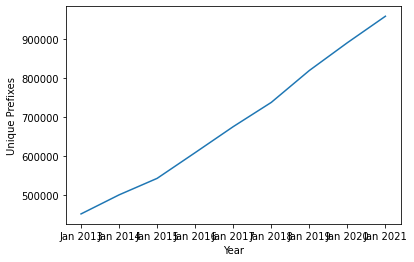

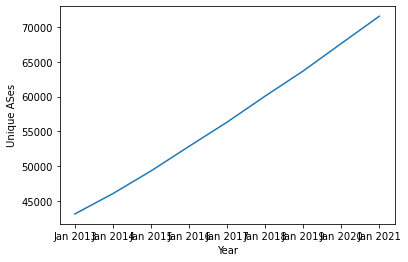

In [31]:
#Replace the contents of this cell with your code for Task 1 part B
count_pfx = []
count_ases = []
for i in range(2013,2022):
    stream = stream_map[i]
    unique_pfx = set()
    unique_ases = set()
    cnt_pfx = 0
    cnt_ases = 0
    for rec in stream.records():
        for elem in rec:
            pfx = elem.fields['prefix']
            if pfx not in unique_pfx:
                unique_pfx.add(pfx)
                cnt_pfx += 1

            ases = elem.fields['as-path'].split(' ')
            for e in ases:
                if e not in unique_ases:
                    unique_ases.add(e)
                    cnt_ases += 1
    count_pfx.append(cnt_pfx)
    count_ases.append(cnt_ases)

time = ['Jan '+ str(i) for i in range(2013,2022)]
plt.plot(time,count_pfx)
plt.ylabel('Unique Prefixes')
plt.xlabel('Year')
plt.show()

plt.plot(time, count_ases)
plt.ylabel('Unique ASes')
plt.xlabel('Year')
plt.show()

**B.**
In the following cells answer the following:

1. What do you notice about the overall trend of the two graphs?
(e.g. how would you describe the overall growth of prefixes, overall growth of ASes)?

<span style="color:red">**Overall, both prefixes and ASes grow linerally over the years.**</span>

2. For each origin AS examine the total unique prefixes they advertise over time.
What is the trend that you notice for most origin ASes?

<span style="color:red">**For the number of unique prefix each origin AS advisetises, even though some origin ASes show slight decrease or stability, most origin AS shows a significant increase over time.**</span>


3. Locate the origin ASes that experience the largest growth of advertised unique prefixes over time.
To calculate the growth for an AS, identify the first and the last snapshot where the AS appeared in the dataset.
Calculate the percentage increase of the advertised prefixes, using the first and the last snapshot. Report the top 10 origin ASes.


<span style="color:red">**The top 10 origin ASes that have been observed with the largest growth of advertised unique prefixes are ['62240', '22884', '21859', '58224', '46573', '36903', '61317', '31898', '385', '135887']**</span>

**Task 2. Historic measurement - AS-path length evolution over time**

For this task you should use the same data collected as in Task 1.
For each origin AS, for each year, compute the shortest AS path length.
To compute the shortest path lengths for each path consider each AS only once
(by removing duplicate entries of the same AS) and count the AS hops in the path.

**A**. To see how the shortest path lengths are distributed across the origin ASes create an
ECDF as follows: For each month, plot an ECDF of the shortest AS path lengths across all origin ASes. You should have
one ECDF for January 2013, one ECDF for January 2014, and so on. You should overlay multiple lines on one chart.

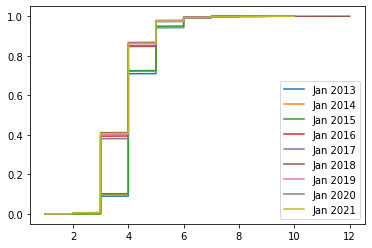

In [32]:
# Replace the contents of this cell with your code for Task 2 part A
from itertools import groupby
from statsmodels.distributions.empirical_distribution import ECDF

for f in os.listdir(filepath):
    year = datetime.fromtimestamp(int(re.search('ribs.(.+?).120', f).group(1))).year
    stream = pybgpstream.BGPStream(data_interface = 'singlefile',record_type = 'ribs')
    stream.set_data_interface_option('singlefile','rib-file',filepath+f)
    stream_map[year] = stream

bgp_lens = defaultdict(lambda: defaultdict(lambda: 0))

for i in range(2013, 2022):
    stream = stream_map[i]
    for rec in stream.records():
        for elem in rec:
            peer = str(elem.peer_asn)
            hops = [k for k,g in groupby(elem.fields['as-path'].split(' '))]
            if len(hops) >= 1:
                origin = hops[-1]
                current_hop = bgp_lens[i][origin]
                if current_hop > 0:
                    bgp_lens[i][origin] = min(len(hops), current_hop)
                else:
                    bgp_lens[i][origin] = len(hops)
                    
for i in range(2013, 2022):
    values = []
    for v in bgp_lens[i].values():
        values.append(v)
    ecdf = ECDF(values)
    plt.plot(ecdf.x, ecdf.y)

plt.legend(['Jan ' + str(i) for i in range(2013, 2022)])
plt.show()

**B.**
In the text/markdown fields after your code cell in the Notebook, answer these 	questions:

1. What is the trend of the AS path lengths progressing over time? Justify your answer with the data you collected – be specific.

<span style="color:red">
Overall, the AS path lengths shows a decreasing trend over time, with length from 5 to 3 showing a growing trend and the short and long path lengths trend reamining stable.
For lengths of 3, 4 and 5, the observation of each length in early years (2013- 2015) is around 10%, 60% and 20% respectively and the observation shifted to around 40%, 50% and 10% in the later years. Shorter paths are observed more in the later years and thus, the path lengths is overall decreasing.</span>

2. From the shortest paths you have already computed, which are the top 5 origin ASes with the longest paths per month,
and do these ASes stay the same as time progresses?

<span style="color:red">**The top 5 origin ASes with the longest paths per month in each year are as below:<br>
2013: 52906,53036,47237,50873,45554<br>
2014: 51979,56369,131361,50483,41800<br>
2015: 44153,47668,472,474,477<br>
2016: 61668,30073,1501,50139,27817<br>
2017: 58216,28976,3263,56660,58250<br>
2018: 12697,62793,59526,59553,1501<br>
2019: 61248,61962,44349,1501,267429<br>
2020: 61362,18155,145,57461,202570<br>
2021: 48608,202570,1501,60663,207281<br>
    They are not the same as time progresses**</span>

**Task 3. Blackholing events**

Have a look at :
What is a Blackhole event? https://tools.ietf.org/html/rfc7999#section-2  

Example Blackhole event: https://blog.apnic.net/2019/03/22/bgp-communities-a-weapon-for-the-internet-part-2/  

**A.**
Locate the directory update_files_blackholing included with this assignment. This is a collection of BGP Updates from
January 2, 2021 5:00 to January 2, 2021 9:00. As in Task 1B, write code to process all of the update cache files.

In [33]:
# Replace the contents of this cell with your code for Task 3 part A
update_file_path = '/home/mininet/Desktop/BGPMeasurements/bgpm/cache_files/update_files_blackholing/'
files = []
blackholinng = []
for f in os.listdir(update_file_path):
    files.append(f)
files.sort()

for f in files:
    stream = pybgpstream.BGPStream(data_interface='singlefile',
                                    filter = 'ipversion 4'
                                    )
    stream.set_data_interface_option('singlefile', 'rib-file', update_file_path + f)
    blackholinng.append(stream)

**B.**
Identify the IPV4 prefixes that are tagged with at least one Remote Triggered Blackholing (RTBH) community. Measure the
time duration of the RBTH event. This is the time elapsed between the Announcement and Withdrawal of the IPV4 prefix
tagged with the RTBH community. We are interested only in non-zero durations. For example, for a stream A1 A2
A3_RTBH_tagged W1 W2 W3 W4, compute the A3_RTBH_tagged - W1 per prefix, and per peer IP.

In [34]:
# Replace the contents of this cell with your code for Task 3 part B
rtbh_elem = defaultdict(lambda: [])

for stream in blackholinng:
    for rec in stream.records():
        for elem in rec:
            if elem.type == 'A':
                pfx = elem.fields['prefix']
                peer_add = elem.peer_address
                rtbh_elem[(pfx, peer_add)].append(('A', int(elem.time), elem))
                communities = elem.fields['communities']
            elif elem.type == 'W':
                pfx = elem.fields['prefix']
                peer_add = elem.peer_address
                if (pfx, peer_add) in rtbh_elem.keys():
                    rtbh_elem[(pfx, peer_add)].append(('W', int(elem.time)))

dur_list = []
for (pfx, peerip) in rtbh_elem.keys():
    curr_A = ()
    prev_is_A = False
    for e in rtbh_elem[(pfx, peerip)]:
        if e[0] == 'A':
            prev_is_A = True
            curr_A = e
        elif e[0] == 'W' and prev_is_A and any(':666' in c for c in curr_A[2].fields['communities']):
            dur = e[1] - curr_A[1]
            if dur > 0:
                dur_list.append(dur)
            prev_is_A = False
            curr_A = ()
        else:
            prev_is_A = False
            curr_A = ()

**C.**
Plot an ECDF of the event durations.

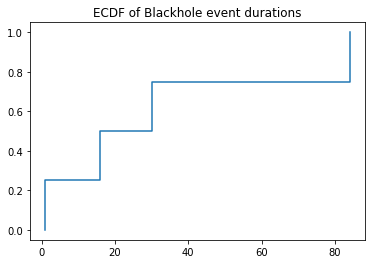

In [35]:
# Replace the contents of this cell with your code for Task 3 part C
ecdf = ECDF(dur_list)
plt.plot(ecdf.x, ecdf.y,drawstyle = 'steps-post')
plt.title('ECDF of Blackhole event durations')
# plt.xlim(0,)
plt.show()

**D.**
In the text/markdown fields after your code cell in the Notebook, answer these questions:

1. How many prefixes did you identify?

<span style="color:red">**Only 1 prefix with RTBH event was identified.**</span>


2. How many RTBH events did you identify for all your identified prefixes?

<span style="color:red">**There are 4 RTBH events for all the identified prefixes.**</span>



**Task 4. A/W Events**

**A.** Locate the directory `update_files_pt4` included with this assignment. This is a collection of BGP Updates for a two-hour
window starting at 21-01-02 05:10. As with previous tasks, you will need to write code to process all of the cache files.
For this section, you will measure the duration of Announcement Withdrawal (AW) events for all IPV4 prefixes.

To do this, you will want to keep track of the tuples <advertised prefix IPV4 – peerIP>, and for each tuple measure the
durations of AW events. For example, for a stream A1 A2 A3 W1 W2 W3 W4, compute the A3-W1 per prefix, and per peer IP.

In [36]:
# Replace the contents of this cell with your code for Task 4 part A
updatept4_file_path = '/home/mininet/Desktop/BGPMeasurements/bgpm/cache_files/update_files_pt4/'
filespt4 = []
durationpt4 = []
for f in os.listdir(updatept4_file_path):
    filespt4.append(f)
filespt4.sort()

for f in filespt4:
    stream = pybgpstream.BGPStream(data_interface='singlefile',
                                   filter='ipversion 4'
                                    )
    stream.set_data_interface_option('singlefile', 'rib-file', updatept4_file_path + f)
    durationpt4.append(stream)

all_elem = defaultdict(lambda: [])

count_communities_rtbh = 0
for stream in durationpt4:
    for rec in stream.records():
        for elem in rec:
            if elem.type == 'A':
                pfx = elem.fields['prefix']
                peer_add = elem.peer_address
                all_elem[(pfx, peer_add)].append(('A', int(elem.time), elem))
            elif elem.type == 'W':
                pfx = elem.fields['prefix']
                peer_add = elem.peer_address
                if (pfx, peer_add) in all_elem.keys():
                    all_elem[(pfx, peer_add)].append(('W', int(elem.time)))
                    
duration_list = defaultdict(lambda: [])

for (pfx, peerip) in all_elem.keys():
    curr_A = ()
    prev_is_A = False
    for e in all_elem[(pfx, peerip)]:
        if e[0] == 'A':
            prev_is_A = True
            curr_A = e
        elif e[0] == 'W' and prev_is_A:
            dur = e[1] - curr_A[1]
            if dur > 0:
                duration_list[(pfx, peerip)].append(dur)
            prev_is_A = False
            curr_A = ()
        else:
            prev_is_A = False
            curr_A = ()
                    
shortest_dur = []
shortest_tuple = set()
count_shortest_dur = 0

for v in duration_list.values():
    for i in v:
        i = int(i)
        if count_shortest_dur < 10:
            count_shortest_dur += 1
            shortest_dur.append(i)
        elif i < max(shortest_dur):
            shortest_dur.remove(max(shortest_dur))
            shortest_dur.append(i)

for k in duration_list.keys():
    if any(x in shortest_dur for x in duration_list[k]):
        shortest_tuple.add(k)

# print(shortest_dur)
# print(shortest_tuple)

**B.**
In the text/markdown fields after your code cell in the Notebook, answer these questions.
Please note that we are only interested in non-zero durations.


1. Which are the tuples <advertised prefix IPV4 – peerIP> with the top 10 shortest AW durations?

<span style="color:red">**There are 230 unique tuples that correspond to the top 10 occurance of shortest AW durations, being: <br>
    ('177.53.131.0/24', '202.249.2.185'), ('103.135.137.0/24', '202.249.2.185'), ('197.156.99.0/24', '202.249.2.185'), ('161.217.67.0/24', '202.249.2.185'), ('154.176.12.0/22', '202.249.2.185'), ('104.70.172.0/24', '202.249.2.185'), ('103.242.184.0/23', '202.249.2.185'), ('150.107.28.0/22', '202.249.2.185'), ('197.156.100.0/22', '202.249.2.185'), ('196.190.96.0/19', '202.249.2.185'), ('196.190.224.0/19', '202.249.2.185'), ('196.191.192.0/18', '202.249.2.185'), ('176.100.128.0/19', '202.249.2.185'), ('119.235.64.0/19', '202.249.2.185'), ('205.107.192.0/24', '202.249.2.185'), ('102.223.112.0/23', '202.249.2.185'), ('91.220.96.0/24', '202.249.2.185'), ('213.55.98.0/23', '202.249.2.185'), ('172.98.176.0/24', '202.249.2.185'), ('84.205.67.0/24', '202.249.2.185'), ('200.196.84.0/24', '202.249.2.185'), ('196.190.160.0/19', '202.249.2.185'), ('102.23.90.0/24', '202.249.2.185'), ('196.189.56.0/24', '202.249.2.185'), ('202.29.11.0/24', '202.249.2.185'), ('64.192.5.0/24', '202.249.2.185'), ('99.194.200.0/22', '202.249.2.185'), ('64.68.236.0/22', '202.249.2.185'), ('35.206.1.0/24', '202.249.2.185'), ('106.76.15.0/24', '202.249.2.185'), ('64.192.1.0/24', '202.249.2.185'), ('199.187.120.0/21', '202.249.2.185'), ('205.68.240.0/20', '202.249.2.185'), ('197.156.94.0/24', '202.249.2.185'), ('177.221.118.0/24', '202.249.2.185'), ('23.47.126.0/24', '202.249.2.185'), ('189.125.73.0/24', '202.249.2.185'), ('203.83.23.0/24', '202.249.2.185'), ('103.117.38.0/24', '202.249.2.185'), ('177.53.135.0/24', '202.249.2.185'), ('196.189.12.0/24', '202.249.2.185'), ('213.55.113.0/24', '202.249.2.185'), ('159.214.0.0/16', '202.249.2.185'), ('216.238.254.0/23', '202.249.2.185'), ('197.156.76.0/22', '202.249.2.185'), ('117.240.231.0/24', '202.249.2.185'), ('63.92.224.0/20', '202.249.2.185'), ('180.151.232.0/24', '202.249.2.185'), ('41.79.198.0/24', '202.249.2.185'), ('103.122.72.0/24', '202.249.2.185'), ('103.132.224.0/24', '202.249.2.185'), ('201.87.247.0/24', '202.249.2.185'), ('191.103.111.0/24', '202.249.2.185'), ('196.189.0.0/18', '202.249.2.185'), ('197.156.126.0/24', '202.249.2.185'), ('103.70.58.0/24', '202.249.2.185'), ('202.29.8.0/24', '202.249.2.185'), ('27.255.63.0/24', '202.249.2.185'), ('157.128.200.0/24', '202.249.2.185'), ('205.99.96.0/20', '202.249.2.185'), ('172.102.212.0/24', '202.249.2.185'), ('196.190.95.0/24', '202.249.2.185'), ('176.96.248.0/24', '202.249.2.185'), ('205.72.64.0/20', '202.249.2.185'), ('177.23.220.0/24', '202.249.2.185'), ('168.91.88.0/22', '202.249.2.185'), ('213.55.90.0/24', '202.249.2.185'), ('84.21.169.0/24', '202.249.2.185'), ('117.222.144.0/20', '202.249.2.185'), ('205.86.82.0/24', '202.249.2.185'), ('117.218.112.0/20', '202.249.2.185'), ('130.137.79.0/24', '202.249.2.185'), ('41.89.234.0/24', '202.249.2.185'), ('64.192.3.0/24', '202.249.2.185'), ('201.158.46.0/24', '202.249.2.185'), ('199.80.161.0/24', '202.249.2.185'), ('103.143.88.0/24', '202.249.2.185'), ('187.103.144.0/24', '202.249.2.185'), ('197.167.152.0/22', '202.249.2.185'), ('103.125.31.0/24', '202.249.2.185'), ('103.143.89.0/24', '202.249.2.185'), ('117.200.48.0/20', '202.249.2.185'), ('45.188.64.0/22', '202.249.2.185'), ('64.192.4.0/24', '202.249.2.185'), ('103.109.237.0/24', '202.249.2.185'), ('205.89.16.0/22', '202.249.2.185'), ('185.164.64.0/24', '202.249.2.185'), ('184.51.92.0/22', '202.249.2.185'), ('45.39.54.0/24', '202.249.2.185'), ('191.53.52.0/24', '202.249.2.185'), ('165.83.26.0/23', '202.249.2.185'), ('130.137.111.0/24', '202.249.2.185'), ('63.92.224.0/19', '202.249.2.185'), ('91.226.58.0/23', '202.249.2.185'), ('130.137.89.0/24', '202.249.2.185'), ('196.188.224.0/19', '202.249.2.185'), ('205.107.52.0/24', '202.249.2.185'), ('187.84.127.0/24', '202.249.2.185'), ('197.156.85.0/24', '202.249.2.185'), ('130.137.81.0/24', '202.249.2.185'), ('168.181.134.0/24', '202.249.2.185'), ('197.156.101.0/24', '202.249.2.185'), ('163.53.72.0/22', '202.249.2.185'), ('130.137.85.0/24', '202.249.2.185'), ('200.196.93.0/24', '202.249.2.185'), ('84.205.71.0/24', '202.249.2.185'), ('103.109.236.0/24', '202.249.2.185'), ('76.72.160.0/20', '202.249.2.185'), ('196.190.65.0/24', '202.249.2.185'), ('184.164.238.0/24', '202.249.2.185'), ('45.15.179.0/24', '202.249.2.185'), ('117.248.16.0/20', '202.249.2.185'), ('184.51.60.0/23', '202.249.2.185'), ('130.137.105.0/24', '202.249.2.185'), ('208.81.64.0/24', '202.249.2.185'), ('205.73.96.0/20', '202.249.2.185'), ('45.163.17.0/24', '202.249.2.185'), ('196.189.57.0/24', '202.249.2.185'), ('142.131.248.0/22', '202.249.2.185'), ('196.202.100.0/24', '202.249.2.185'), ('196.189.26.0/24', '202.249.2.185'), ('67.211.53.0/24', '202.249.2.185'), ('185.66.226.0/24', '202.249.2.185'), ('191.103.108.0/24', '202.249.2.185'), ('170.79.248.0/23', '202.249.2.185'), ('117.202.32.0/20', '202.249.2.185'), ('103.117.39.0/24', '202.249.2.185'), ('27.123.247.0/24', '202.249.2.185'), ('103.127.183.0/24', '202.249.2.185'), ('176.67.215.0/24', '202.249.2.185'), ('213.204.92.0/24', '202.249.2.185'), ('170.79.250.0/23', '202.249.2.185'), ('172.98.161.0/24', '202.249.2.185'), ('117.208.224.0/20', '202.249.2.185'), ('197.156.124.0/24', '202.249.2.185'), ('189.125.236.0/24', '202.249.2.185'), ('68.66.25.0/24', '202.249.2.185'), ('130.137.90.0/24', '202.249.2.185'), ('130.137.102.0/24', '202.249.2.185'), ('130.137.99.0/24', '202.249.2.185'), ('203.219.131.0/24', '202.249.2.185'), ('196.188.245.0/24', '202.249.2.185'), ('214.60.59.0/24', '202.249.2.185'), ('202.29.10.0/24', '202.249.2.185'), ('23.41.224.0/20', '202.249.2.185'), ('5.253.233.0/24', '202.249.2.185'), ('130.137.78.0/24', '202.249.2.185'), ('59.96.160.0/20', '202.249.2.185'), ('191.103.107.0/24', '202.249.2.185'), ('196.189.63.0/24', '202.249.2.185'), ('177.36.3.0/24', '202.249.2.185'), ('117.218.80.0/20', '202.249.2.185'), ('125.224.62.0/24', '202.249.2.185'), ('117.192.160.0/20', '202.249.2.185'), ('177.53.134.0/24', '202.249.2.185'), ('189.91.49.0/24', '202.249.2.185'), ('185.239.93.0/24', '202.249.2.185'), ('205.98.32.0/20', '202.249.2.185'), ('130.137.80.0/24', '202.249.2.185'), ('64.184.245.0/24', '202.249.2.185'), ('184.26.39.0/24', '202.249.2.185'), ('84.236.152.0/24', '202.249.2.185'), ('214.60.61.0/24', '202.249.2.185'), ('201.158.43.0/24', '202.249.2.185'), ('192.64.69.0/24', '202.249.2.185'), ('84.205.66.0/24', '202.249.2.185'), ('103.136.200.0/23', '202.249.2.185'), ('187.84.125.0/24', '202.249.2.185'), ('117.253.160.0/20', '202.249.2.185'), ('196.190.127.0/24', '202.249.2.185'), ('172.102.204.0/24', '202.249.2.185'), ('184.25.0.0/20', '202.249.2.185'), ('103.93.40.0/22', '202.249.2.185'), ('41.223.184.0/24', '202.249.2.185'), ('185.164.65.0/24', '202.249.2.185'), ('192.100.178.0/24', '202.249.2.185'), ('191.240.38.0/24', '202.249.2.185'), ('196.49.72.0/24', '202.249.2.185'), ('103.150.56.0/24', '202.249.2.185'), ('106.76.13.0/24', '202.249.2.185'), ('64.192.0.0/24', '202.249.2.185'), ('170.80.56.0/24', '202.249.2.185'), ('117.216.80.0/20', '202.249.2.185'), ('177.53.129.0/24', '202.249.2.185'), ('191.240.38.0/23', '202.249.2.185'), ('31.22.110.0/24', '202.249.2.185'), ('213.55.101.0/24', '202.249.2.185'), ('84.205.68.0/24', '202.249.2.185'), ('196.188.192.0/18', '202.249.2.185'), ('142.131.252.0/24', '202.249.2.185'), ('103.242.184.0/22', '202.249.2.185'), ('202.29.9.0/24', '202.249.2.185'), ('117.216.144.0/20', '202.249.2.185'), ('177.53.130.0/24', '202.249.2.185'), ('205.86.81.0/24', '202.249.2.185'), ('194.36.164.0/24', '202.249.2.185'), ('83.101.130.0/24', '202.249.2.185'), ('205.98.128.0/20', '202.249.2.185'), ('184.27.48.0/20', '202.249.2.185'), ('196.191.250.0/24', '202.249.2.185'), ('117.248.48.0/20', '202.249.2.185'), ('172.98.180.0/24', '202.249.2.185'), ('172.98.189.0/24', '202.249.2.185'), ('103.148.64.0/24', '202.249.2.185'), ('149.13.25.0/24', '202.249.2.185'), ('59.92.192.0/20', '202.249.2.185'), ('197.156.79.0/24', '202.249.2.185'), ('117.239.136.0/21', '202.249.2.185'), ('205.78.128.0/20', '202.249.2.185'), ('143.70.237.0/24', '202.249.2.185'), ('45.128.120.0/24', '202.249.2.185'), ('41.89.220.0/24', '202.249.2.185'), ('196.189.84.0/24', '202.249.2.185'), ('196.188.160.0/19', '202.249.2.185'), ('177.39.104.0/22', '202.249.2.185'), ('170.80.57.0/24', '202.249.2.185'), ('84.205.82.0/24', '202.249.2.185'), ('130.137.86.0/24', '202.249.2.185'), ('64.192.2.0/24', '202.249.2.185'), ('187.103.152.0/24', '202.249.2.185'), ('214.60.91.0/24', '202.249.2.185'), ('197.156.117.0/24', '202.249.2.185'), ('82.132.185.0/24', '202.249.2.185'), ('196.190.255.0/24', '202.249.2.185'), ('189.8.108.0/23', '202.249.2.185'), ('41.178.196.0/23', '202.249.2.185'), ('196.188.43.0/24', '202.249.2.185'), ('117.253.144.0/20', '202.249.2.185'), ('172.121.90.0/24', '202.249.2.185'), ('45.73.168.0/23', '202.249.2.185')**</span>


2. What are the corresponding durations?

<span style="color:red">**The top 10 occurance of shortest duration in this question all equals to 1, being [1,1,1,1,1,1,1,1,1,1]**</span>